# Import libraries

In [1]:
import pandas as pd
from scipy import stats
from scipy.stats import skew
import numpy as np
import matplotlib.pyplot as plt

## Import data and remove the data without salary value

In [2]:
file = r'E:\Homework\IS\data\survey_results_public.csv'
raw_data = pd.read_csv(file)
data = raw_data.dropna(subset=["ConvertedCompYearly"])

In [3]:
data.columns

Index(['ResponseId', 'Q120', 'MainBranch', 'Age', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'TechList', 'BuyNewTool', 'Country',
       'Currency', 'CompTotal', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysPersonal use',
       'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith',
       'OfficeStackAsyncWantToWorkWith', 'OfficeStackSyncHaveWorkedWith',
       'OfficeStackSyncWantToWorkWith', 'AISearchHaveWorkedWith',
       'AISearchWan

## Only the columns that are use for research is kept

In [4]:
columns_to_keep = [
 'MainBranch', 'Age', 'Employment', 'RemoteWork',
 'EdLevel', 'YearsCode', 'YearsCodePro', 'DevType',
 'OrgSize', 'PurchaseInfluence', 
 'LanguageHaveWorkedWith', 'DatabaseHaveWorkedWith', 'PlatformHaveWorkedWith',
 'WebframeHaveWorkedWith', 'MiscTechHaveWorkedWith','ToolsTechHaveWorkedWith','NEWCollabToolsHaveWorkedWith',
 'OfficeStackAsyncHaveWorkedWith', 'OfficeStackSyncHaveWorkedWith', 'WorkExp', 'ConvertedCompYearly']

In [5]:
data = data.loc[:, columns_to_keep]
data.head()

MainBranch              Age  \
1  I am a developer by profession  25-34 years old   
2  I am a developer by profession  45-54 years old   
3  I am a developer by profession  25-34 years old   
4  I am a developer by profession  25-34 years old   
5  I am a developer by profession  35-44 years old   

                                          Employment  \
1                                Employed, full-time   
2                                Employed, full-time   
3                                Employed, full-time   
4  Employed, full-time;Independent contractor, fr...   
5                                Employed, full-time   

                             RemoteWork  \
1                                Remote   
2  Hybrid (some remote, some in-person)   
3  Hybrid (some remote, some in-person)   
4                                Remote   
5                                Remote   

                                             EdLevel YearsCode YearsCodePro  \
1       Bachelor’s degree (B.A., B.S., B.Eng., etc.)        18            9   
2       Bachelor’s degree (B.A., B.S., B.Eng., etc.)        27           23   
3       Bachelor’s degree (B.A., B.S., B.Eng., etc.)        12            7   
4       Bachelor’s degree (B.A., B.S., B.Eng., etc.)         6            4   
5  Some college/university study without earning ...        21           21   

                                DevType                   OrgSize  \
1  Senior Executive (C-Suite, VP, etc.)          2 to 9 employees   
2                   Developer, back-end  5,000 to 9,999 employees   
3                  Developer, front-end      100 to 499 employees   
4                 Developer, full-stack        20 to 99 employees   
5                   Developer, back-end      100 to 499 employees   

                  PurchaseInfluence  ...  \
1  I have a great deal of influence  ...   
2             I have some influence  ...   
3             I have some influence  ...   
4             I have some influence  ...   
5     I have little or no influence  ...   

                      DatabaseHaveWorkedWith  \
1                                   Supabase   
2                                        NaN   
3                           PostgreSQL;Redis   
4  BigQuery;Elasticsearch;MongoDB;PostgreSQL   
5  BigQuery;Cloud Firestore;PostgreSQL;Redis   

                              PlatformHaveWorkedWith  \
1           Amazon Web Services (AWS);Netlify;Vercel   
2  Amazon Web Services (AWS);Google Cloud;OpenSta...   
3                                  Cloudflare;Heroku   
4  Amazon Web Services (AWS);Firebase;Heroku;Netl...   
5  Amazon Web Services (AWS);Cloudflare;Google Cloud   

                         WebframeHaveWorkedWith       MiscTechHaveWorkedWith  \
1                    Next.js;React;Remix;Vue.js  Electron;React Native;Tauri   
2                                           NaN                          NaN   
3  Node.js;React;Ruby on Rails;Vue.js;WordPress                          NaN   
4   Express;Gatsby;NestJS;Next.js;Node.js;React                          NaN   
5                Angular;Express;NestJS;Node.js                          NaN   

                         ToolsTechHaveWorkedWith  \
1    Docker;Kubernetes;npm;Pip;Vite;Webpack;Yarn   
2               Cargo;Docker;Kubernetes;Make;Nix   
3                 Homebrew;npm;Vite;Webpack;Yarn   
4                        Docker;npm;Webpack;Yarn   
5  Docker;Homebrew;Kubernetes;npm;pnpm;Terraform   

                    NEWCollabToolsHaveWorkedWith  \
1                         Vim;Visual Studio Code   
2                                    Emacs;Helix   
3  IntelliJ IDEA;Vim;Visual Studio Code;WebStorm   
4                         Vim;Visual Studio Code   
5                                   Helix;Neovim   

                      OfficeStackAsyncHaveWorkedWith  \
1  Asana;Basecamp;GitHub Discussions;Jira;Linear;...   
2             Markdown File;Stack Overflow for Teams   
3                                             

### Function for plotting the histogram

In [6]:
def plot_histogram_with_stats(data, column):
    """
    Plot a histogram of a specified column from a DataFrame and display statistical information.

    Args:
        data (pandas.DataFrame): The DataFrame containing the data.
        column (str): The name of the column to plot the histogram for.

    Returns:
        None
    """
    # Set the figure size
    plt.figure(figsize=(8, 6))
    
    # Plot the histogram of the specified column with 1000 bins
    plt.hist(data[column], bins=1000)
    
    # Calculate statistical measures
    mean = data[column].mean()
    median = data[column].median()
    std_dev = data[column].std()
    skewness = skew(data[column])
    
    # Plot vertical lines for the mean and median
    plt.axvline(mean, color='red', linestyle='dashed', linewidth=2, label='Mean')
    plt.axvline(median, color='green', linestyle='dashed', linewidth=2, label='Median')
    
    # Create a text string with the statistical information
    stats_text = f'Mean: {mean:.2f}\nMedian: {median:.2f}\nStd. Dev.: {std_dev:.2f}\nSkewness: {skewness:.2f}'
    
    # Add the statistical information as text to the plot
    plt.text(0.95, 0.95, stats_text, transform=plt.gca().transAxes,
             fontsize=12, verticalalignment='top', horizontalalignment='right',
             bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 5})
    
    # Set the x-label, y-label, and title of the plot
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    
    # Display the plot
    plt.show()

#### The histogram of the salary data with outliers.

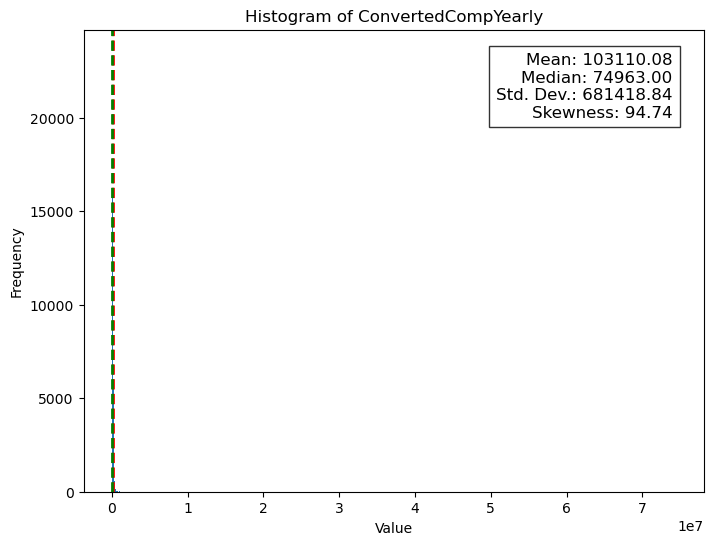

In [7]:
plot_histogram_with_stats(data, 'ConvertedCompYearly')

## Remove outliers

### Percentile-based method

In [8]:
def remove_outliers_percentile(df, column):
    """
    Remove outliers from a DataFrame using the percentile method based on a specific column.

    Args:
        df (pandas.DataFrame): The input DataFrame.
        column (str): The name of the column to apply outlier removal.

    Returns:
        pandas.DataFrame: The DataFrame with outliers removed.
    """
    #set the percentiles
    lower_percentile=5
    upper_percentile=95
    
    # Define the lower and upper bounds for outliers
    lower_bound = np.percentile(df[column], lower_percentile)
    upper_bound = np.percentile(df[column], upper_percentile)
    
    # Filter the DataFrame to remove outliers
    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return filtered_df

In [9]:
percentile_data = remove_outliers_percentile(data, 'ConvertedCompYearly')
percentile_data

MainBranch              Age  \
3      I am a developer by profession  25-34 years old   
4      I am a developer by profession  25-34 years old   
5      I am a developer by profession  35-44 years old   
6      I am a developer by profession  35-44 years old   
7      I am a developer by profession  25-34 years old   
...                               ...              ...   
89162  I am a developer by profession  35-44 years old   
89166  I am a developer by profession  18-24 years old   
89167  I am a developer by profession  18-24 years old   
89170  I am a developer by profession  25-34 years old   
89171  I am a developer by profession  25-34 years old   

                                              Employment  \
3                                    Employed, full-time   
4      Employed, full-time;Independent contractor, fr...   
5                                    Employed, full-time   
6                                    Employed, full-time   
7                                    Employed, full-time   
...                                                  ...   
89162                                Employed, full-time   
89166  Employed, full-time;Independent contractor, fr...   
89167                                Employed, full-time   
89170                                Employed, full-time   
89171                                Employed, full-time   

                                 RemoteWork  \
3      Hybrid (some remote, some in-person)   
4                                    Remote   
5                                    Remote   
6                                    Remote   
7                                    Remote   
...                                     ...   
89162                                Remote   
89166                             In-person   
89167                                Remote   
89170  Hybrid (some remote, some in-person)   
89171                             In-person   

                                                 EdLevel YearsCode  \
3           Bachelor’s degree (B.A., B.S., B.Eng., etc.)        12   
4           Bachelor’s degree (B.A., B.S., B.Eng., etc.)         6   
5      Some college/university study without earning ...        21   
6      Some college/university study without earning ...         4   
7           Bachelor’s degree (B.A., B.S., B.Eng., etc.)         5   
...                                                  ...       ...   
89162    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)        30   
89166  Some college/university study without earning ...         7   
89167       Bachelor’s degree (B.A., B.S., B.Eng., etc.)         6   
89170    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)        18   
89171    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)        20   

      YearsCodePro                  DevType                   OrgSize  \
3                7     Developer, front-end      100 to 499 employees   
4                4    Developer, full-stack        20 to 99 employees   
5               21      Developer, back-end      100 to 499 employees   
6                3    Developer, full-stack  1,000 to 4,999 employees   
7                3    Developer, full-stack        10 to 19 employees   
...            ...                      ...                       ...   
89162           24      Developer, back-end  5,000 to 9,999 employees   
89166            2    Developer, full-stack        20 to 99 employees   
89167            2        Developer, mobile        20 to 99 employees   
89170            9  Other (please specify):      500 to 999 employees   
89171            9    Developer, full-stack        10 to 19 employees   

                   PurchaseInfluence  ...  \
3              I have some influence  ...   
4              I have some influence  ...   
5      I have little or no influence  ...   
6      I have little or no influence  ...   
7              I have some influence  ...   
...                              ...  ...   
89162      

In [10]:
percentile_data.describe()

WorkExp  ConvertedCompYearly
count  29537.000000         43313.000000
mean      11.458848         85331.997022
std        8.716381         50656.085882
min        0.000000          6503.000000
25%        5.000000         47914.000000
50%        9.000000         74963.000000
75%       16.000000        116190.000000
max       50.000000        230000.000000

### Interquartile Range (IQR) method.

In [11]:
def remove_outliers_iqr(df, column):
    """
    Remove outliers from a DataFrame using the IQR method based on a specific column.

    Args:
        df (pandas.DataFrame): The input DataFrame.
        column (str): The name of the column to apply outlier removal.

    Returns:
        pandas.DataFrame: The DataFrame with outliers removed.
    """
    # Calculate the first and third quartiles
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    
    # Calculate the IQR
    iqr = q3 - q1
    
    # Define the lower and upper bounds for outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Filter the DataFrame to remove outliers
    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return filtered_df

In [12]:
iqr_data = remove_outliers_iqr(data, 'ConvertedCompYearly')
iqr_data.head()

MainBranch              Age  \
3  I am a developer by profession  25-34 years old   
4  I am a developer by profession  25-34 years old   
5  I am a developer by profession  35-44 years old   
6  I am a developer by profession  35-44 years old   
7  I am a developer by profession  25-34 years old   

                                          Employment  \
3                                Employed, full-time   
4  Employed, full-time;Independent contractor, fr...   
5                                Employed, full-time   
6                                Employed, full-time   
7                                Employed, full-time   

                             RemoteWork  \
3  Hybrid (some remote, some in-person)   
4                                Remote   
5                                Remote   
6                                Remote   
7                                Remote   

                                             EdLevel YearsCode YearsCodePro  \
3       Bachelor’s degree (B.A., B.S., B.Eng., etc.)        12            7   
4       Bachelor’s degree (B.A., B.S., B.Eng., etc.)         6            4   
5  Some college/university study without earning ...        21           21   
6  Some college/university study without earning ...         4            3   
7       Bachelor’s degree (B.A., B.S., B.Eng., etc.)         5            3   

                 DevType                   OrgSize  \
3   Developer, front-end      100 to 499 employees   
4  Developer, full-stack        20 to 99 employees   
5    Developer, back-end      100 to 499 employees   
6  Developer, full-stack  1,000 to 4,999 employees   
7  Developer, full-stack        10 to 19 employees   

               PurchaseInfluence  ...  \
3          I have some influence  ...   
4          I have some influence  ...   
5  I have little or no influence  ...   
6  I have little or no influence  ...   
7          I have some influence  ...   

                              DatabaseHaveWorkedWith  \
3                                   PostgreSQL;Redis   
4          BigQuery;Elasticsearch;MongoDB;PostgreSQL   
5          BigQuery;Cloud Firestore;PostgreSQL;Redis   
6  MariaDB;Microsoft SQL Server;MySQL;PostgreSQL;...   
7                Dynamodb;MongoDB;MySQL;Redis;SQLite   

                              PlatformHaveWorkedWith  \
3                                  Cloudflare;Heroku   
4  Amazon Web Services (AWS);Firebase;Heroku;Netl...   
5  Amazon Web Services (AWS);Cloudflare;Google Cloud   
6            Amazon Web Services (AWS);Digital Ocean   
7    Amazon Web Services (AWS);Fly.io;Netlify;Vercel   

                              WebframeHaveWorkedWith  \
3       Node.js;React;Ruby on Rails;Vue.js;WordPress   
4        Express;Gatsby;NestJS;Next.js;Node.js;React   
5                     Angular;Express;NestJS;Node.js   
6  AngularJS;jQuery;Node.js;Phoenix;Ruby on Rails...   
7              Angular;Express;Next.js;Node.js;React   

                       MiscTechHaveWorkedWith  \
3                                         NaN   
4                                         NaN   
5                                         NaN   
6                   RabbitMQ;Spring Framework   
7  NumPy;Pandas;Scikit-Learn;Tauri;TensorFlow   

                             ToolsTechHaveWorkedWith  \
3                     Homebrew;npm;Vite;Webpack;Yarn   
4                            Docker;npm;Webpack;Yarn   
5      Docker;Homebrew;Kubernetes;npm;pnpm;Terraform   
6  Bun;Cargo;Chocolatey;Docker;Homebrew;Kubernete...   
7  Ansible;Cargo;Docker;Homebrew;Make;npm;Pip;pnp...   

                        NEWCollabToolsHaveWorkedWith  \
3      IntelliJ IDEA;Vim;Visual Studio Code;WebStorm   
4                             Vim;Visual Studio Code   
5                                       Helix;Neovim   
6  Emacs;IntelliJ IDEA;RubyMine;Visual Studio Cod...   
7     DataGrip;IPython;Neovim;Vim;Visual Studio Code   

                      OfficeStackAsyncHaveWorkedWith  \
3                  

In [13]:
iqr_data.describe()

WorkExp  ConvertedCompYearly
count  31260.000000         45813.000000
mean      11.211740         81323.397464
std        8.715019         53067.505365
min        0.000000             1.000000
25%        5.000000         42836.000000
50%        9.000000         72000.000000
75%       15.000000        112377.000000
max       50.000000        238000.000000

### Z-score method

In [14]:
def filter_by_zscore(data, column_for_z):
    """
    Filters a DataFrame based on the z-score of a specified column and drops the
    z-score column from the resulting DataFrame.

    Args:
        data: The input DataFrame.
        column: The name of the column to calculate the z-score for.

    Returns:
        A DataFrame containing only the rows where the z-score of the specified
        column is between -3 and 3 (inclusive).
    """
    
    data['Zscore'] = stats.zscore(data[column_for_z])
    filtered_data = data[(data['Zscore'] >= -3) & (data['Zscore'] <= 3)]
    filtered_data = filtered_data.drop(columns=['Zscore'])
    return filtered_data

In [15]:
z_data = filter_by_zscore(data,'ConvertedCompYearly')
z_data

MainBranch              Age  \
1      I am a developer by profession  25-34 years old   
2      I am a developer by profession  45-54 years old   
3      I am a developer by profession  25-34 years old   
4      I am a developer by profession  25-34 years old   
5      I am a developer by profession  35-44 years old   
...                               ...              ...   
89162  I am a developer by profession  35-44 years old   
89166  I am a developer by profession  18-24 years old   
89167  I am a developer by profession  18-24 years old   
89170  I am a developer by profession  25-34 years old   
89171  I am a developer by profession  25-34 years old   

                                              Employment  \
1                                    Employed, full-time   
2                                    Employed, full-time   
3                                    Employed, full-time   
4      Employed, full-time;Independent contractor, fr...   
5                                    Employed, full-time   
...                                                  ...   
89162                                Employed, full-time   
89166  Employed, full-time;Independent contractor, fr...   
89167                                Employed, full-time   
89170                                Employed, full-time   
89171                                Employed, full-time   

                                 RemoteWork  \
1                                    Remote   
2      Hybrid (some remote, some in-person)   
3      Hybrid (some remote, some in-person)   
4                                    Remote   
5                                    Remote   
...                                     ...   
89162                                Remote   
89166                             In-person   
89167                                Remote   
89170  Hybrid (some remote, some in-person)   
89171                             In-person   

                                                 EdLevel YearsCode  \
1           Bachelor’s degree (B.A., B.S., B.Eng., etc.)        18   
2           Bachelor’s degree (B.A., B.S., B.Eng., etc.)        27   
3           Bachelor’s degree (B.A., B.S., B.Eng., etc.)        12   
4           Bachelor’s degree (B.A., B.S., B.Eng., etc.)         6   
5      Some college/university study without earning ...        21   
...                                                  ...       ...   
89162    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)        30   
89166  Some college/university study without earning ...         7   
89167       Bachelor’s degree (B.A., B.S., B.Eng., etc.)         6   
89170    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)        18   
89171    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)        20   

      YearsCodePro                               DevType  \
1                9  Senior Executive (C-Suite, VP, etc.)   
2               23                   Developer, back-end   
3                7                  Developer, front-end   
4                4                 Developer, full-stack   
5               21                   Developer, back-end   
...            ...                                   ...   
89162           24                   Developer, back-end   
89166            2                 Developer, full-stack   
89167            2                     Developer, mobile   
89170            9               Other (please specify):   
89171            9                 Developer, full-stack   

                        OrgSize                 PurchaseInfluence  ...  \
1              2 to 9 employees  I have a great deal of influence  ...   
2      5,000 to 9,999 employees             I have some influence  ...   
3          100 to 499 employees             I have some influence  ...   
4            20 to 99 employees             I have some influence  ...   
5          100 to 499 employees     I have little or no influence  ...   
...                         ...       

In [16]:
z_data.describe()

WorkExp  ConvertedCompYearly
count  32624.000000         4.799300e+04
mean      11.434527         9.389159e+04
std        8.816838         8.783821e+04
min        0.000000         1.000000e+00
25%        5.000000         4.390700e+04
50%        9.000000         7.496300e+04
75%       16.000000         1.213420e+05
max       50.000000         2.141791e+06

## The histogram of salary after removing outliers by different methods

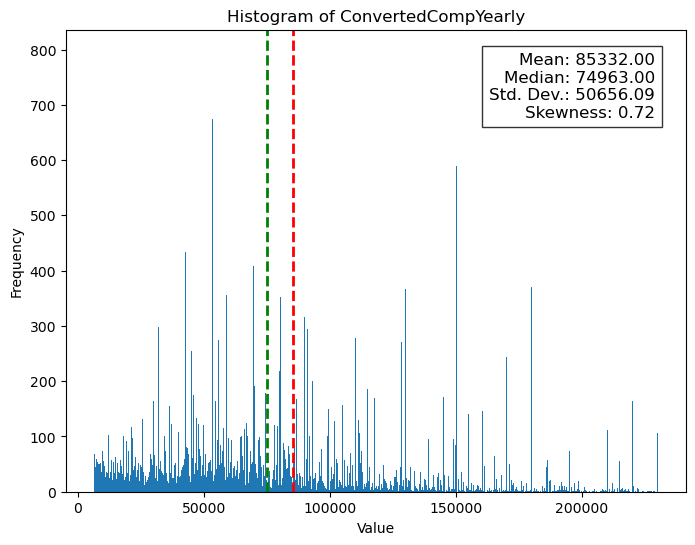

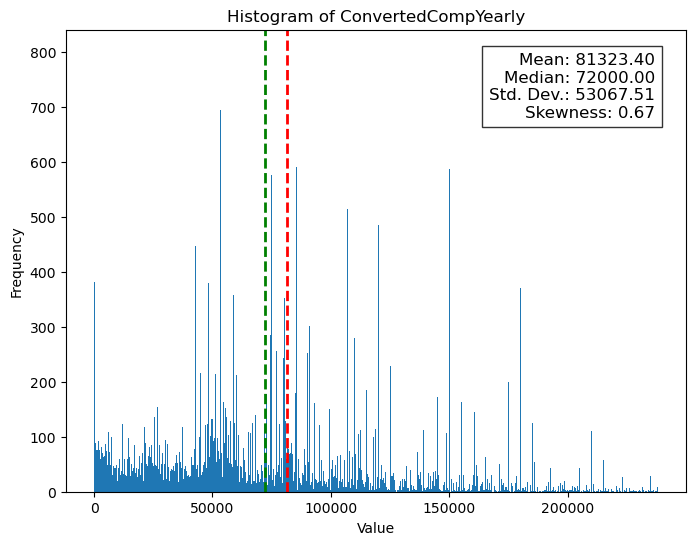

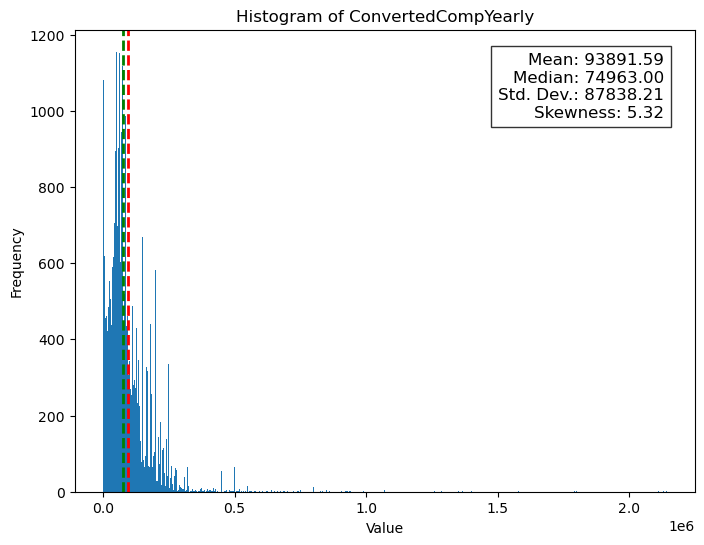

In [17]:
plot_histogram_with_stats(percentile_data, 'ConvertedCompYearly')

plot_histogram_with_stats(iqr_data, 'ConvertedCompYearly')

plot_histogram_with_stats(z_data, 'ConvertedCompYearly')

In [18]:
data = percentile_data

In [19]:
# make the Target variable the first column
data.insert(0, 'ConvertedCompYearly', data.pop('ConvertedCompYearly'))
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43313 entries, 3 to 89171
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ConvertedCompYearly             43313 non-null  float64
 1   MainBranch                      43313 non-null  object 
 2   Age                             43313 non-null  object 
 3   Employment                      43301 non-null  object 
 4   RemoteWork                      43255 non-null  object 
 5   EdLevel                         43313 non-null  object 
 6   YearsCode                       43253 non-null  object 
 7   YearsCodePro                    43151 non-null  object 
 8   DevType                         43225 non-null  object 
 9   OrgSize                         43280 non-null  object 
 10  PurchaseInfluence               43277 non-null  object 
 11  LanguageHaveWorkedWith          43197 non-null  object 
 12  DatabaseHaveWorkedWith          37717

In [20]:
def get_unique_results(df, columns):
    """
    Return a formatted string with unique values for each specified column.

    Args:
        df (pandas.DataFrame): The input DataFrame.
        columns (list): A list of column names.

    Returns:
        str: The formatted string with unique values for each column.
    """
    result = ""
    for column in columns:
        unique_values = df[column].unique()
        result += f"{column}:\n"
        for value in unique_values:
            result += f"  {value}\n"
        result += "\n"
    return result.strip()

In [21]:
print(get_unique_results(data, data.columns[1:]))

MainBranch:
  I am a developer by profession
  I am not primarily a developer, but I write code sometimes as part of my work/studies

Age:
  25-34 years old
  35-44 years old
  45-54 years old
  55-64 years old
  18-24 years old
  65 years or older
  Under 18 years old
  Prefer not to say

Employment:
  Employed, full-time
  Employed, full-time;Independent contractor, freelancer, or self-employed
  Independent contractor, freelancer, or self-employed
  Employed, part-time
  Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time
  Retired
  Employed, full-time;Employed, part-time
  Independent contractor, freelancer, or self-employed;Employed, part-time
  nan
  I prefer not to say
  Independent contractor, freelancer, or self-employed;Retired
  Employed, full-time;Retired
  Employed, full-time;Independent contractor, freelancer, or self-employed;Retired
  Employed, part-time;Retired

RemoteWork:
  Hybrid (some remote, some in-person)
  Remote
  In-p

In [22]:
data = data[data['Age'] != 'Prefer not to say']

In [23]:
def remove_retired_rows(df, column_name):
    """
    Removes rows from a DataFrame where the specified column contains the substring 'Retired'.

    Args:
        df (pandas.DataFrame): The input DataFrame.
        column_name (str): The name of the column to check for the substring 'Retired'.

    Returns:
        pandas.DataFrame: The DataFrame with rows containing 'Retired' in the specified column removed.
    """
    if column_name not in df.columns:
        print(f"Column '{column_name}' not found in the DataFrame.")
        return df
    
    # Check the data type of the specified column
    if df[column_name].dtype == float:
        # Convert float column to string before applying str.contains()
        mask = ~df[column_name].astype(str).str.contains('Retired')
    else:
        # Create a boolean mask for rows where the specified column does not contain 'Retired'
        mask = ~df[column_name].str.contains('Retired')
    
    # Apply the mask to the DataFrame to remove rows containing 'Retired'
    df = df[mask]
    
    return df

In [24]:
data['Employment'] = data['Employment'].fillna('I prefer not to say')
data = data[data['Employment'] != 'I prefer not to say']
data = remove_retired_rows(data, 'Employment')

C:\Users\user\AppData\Local\Temp\ipykernel_66464\3148671517.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Employment'] = data['Employment'].fillna('I prefer not to say')


In [25]:
data = data.loc[data['RemoteWork'].notna()]

In [26]:
ed_mapping = {
    'Primary/elementary school': 'Primary/elementary school',
    'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)': 'Secondary school',
    'Some college/university study without earning a degree': 'Some college/university study without earning a degree',
    'Associate degree (A.A., A.S., etc.)': 'Associate degree',
    "Bachelor’s degree (B.A., B.S., B.Eng., etc.)": 'Bachelors degree',
    "Master’s degree (M.A., M.S., M.Eng., MBA, etc.)": 'Masters degree',
    'Professional degree (JD, MD, Ph.D, Ed.D, etc.)': 'Professional degree',
    'Something else': 'Something else'
}

# Map the values in the 'EdLevel' column using the mapping dictionary
data['EdLevel'] = data['EdLevel'].map(ed_mapping)
data = data[data['EdLevel'] != 'Something else']

In [27]:
data['YearsCode'] = data['YearsCode'].fillna(data['YearsCodePro'])
data['YearsCodePro'] = data['YearsCodePro'].fillna(data['YearsCode'])

In [28]:
def encode_years(df, column):
    """
    Encodes the "More than 50 years" value in a column to a numerical value based on the IQR,
    and handles existing missing values separately.

    Parameters:
    - df (pandas.DataFrame): The input DataFrame containing the column to be encoded.
    - column (str): The name of the column to be encoded.

    Returns:
    - pandas.DataFrame: The DataFrame with the encoded column.
    """
    df[column] = df[column].replace('Less than 1 year', 0)

    # Replace "More than 50 years" with a specific value, e.g., 999
    df[column] = df[column].replace('More than 50 years', 999)

    # Convert the column to numeric type, coercing existing missing values to NaN
    df[column] = pd.to_numeric(df[column], errors='coerce')

    # Calculate the IQR of the non-missing values (excluding 999)
    Q1 = df[column][df[column] != 999].quantile(0.25)
    Q3 = df[column][df[column] != 999].quantile(0.75)
    IQR = Q3 - Q1

    # Replace 999 (representing "More than 50 years") with the maximum value plus the IQR
    max_value = df[column][df[column] != 999].max()
    df.loc[df[column] == 999, column] = max_value + IQR

    # Handle existing missing values separately, e.g., by imputing with the median
    median_value = df[column][df[column] != 999].median()
    df[column] = df[column].fillna(median_value)

    return df

In [29]:
data = encode_years(data, 'YearsCode')
data = encode_years(data, 'YearsCodePro')

In [30]:
data['DevType'] = data['DevType'].fillna("Other (please specify):")
data['DevType'] = data['DevType'].replace('Other (please specify):', 'Other')
data = data[data['DevType'] != 'Other']

In [31]:
data['OrgSize'] = data['OrgSize'].fillna("I don’t know")
data = data[data['OrgSize'] != 'I don’t know']

In [32]:
data = data.loc[data['PurchaseInfluence'].notna()]

In [33]:
data['WorkExp'] = data['WorkExp'].fillna(data['YearsCodePro'])

In [34]:
from collections import OrderedDict

def count_items(df: pd.DataFrame, column: str) -> OrderedDict:
    """
    Count the occurrences of each item in a specified column and return an ordered dictionary
    of item counts and popularity scores sorted in decreasing order.

    Args:
        df: The input DataFrame.
        column: The name of the column to count items in.

    Returns:
        An ordered dictionary mapping each item to a tuple of its count and popularity score,
        sorted in decreasing order by count.
    """
    item_counts = {}

    def update_item_counts(value: str):
        """
        Update the item counts dictionary with the items from a string value.

        Args:
            value: The input string value.
        """
        if pd.notna(value):
            items = str(value).split(';')
            for item in items:
                item = item.strip()
                if item in item_counts:
                    item_counts[item] += 1
                else:
                    item_counts[item] = 1

    df[column].apply(update_item_counts)

    max_count = max(item_counts.values())
    item_scores = {item: count / max_count for item, count in item_counts.items()}

    sorted_item_counts = OrderedDict(
        sorted(
            [(item, (count, item_scores[item])) for item, count in item_counts.items()],
            key=lambda x: x[1][0],
            reverse=True
        )
    )

    return sorted_item_counts

In [35]:
def calculate_popularity_scores(df: pd.DataFrame, column: str) -> pd.DataFrame:
    """
    Calculate the popularity scores for each row in a specified column based on item counts.

    Args:
        df: The input DataFrame.
        column: The name of the column to calculate popularity scores for.

    Returns:
        The DataFrame with a new column containing the popularity scores.
    """
    item_counts_scores = count_items(df, column)

    def calculate_row_popularity(value: str) -> float:
        """
        Calculate the popularity score for a single row based on item counts.

        Args:
            value: The input string value.

        Returns:
            The popularity score for the row.
        """
        if pd.isna(value):
            return 0.0

        items = str(value).split(';')
        total_score = 0.0
        for item in items:
            item = item.strip()
            if item in item_counts_scores:
                total_score += item_counts_scores[item][1]
        return total_score

    new_column = f"{column}_popularity_score"
    df[new_column] = df[column].apply(calculate_row_popularity)
    return df

In [36]:
def count_items_in_column(df: pd.DataFrame, column: str) -> pd.DataFrame:
    """
    Count the number of items in a specified column and add a new column with the counts.

    Args:
        df: The input DataFrame.
        column: The name of the column to count items in.

    Returns:
        The DataFrame with a new column containing the item counts.
    """
    def count_semicolon_separated_items(value: str) -> int:
        """
        Count the number of semicolon-separated items in a string.

        Args:
            value: The input string value.

        Returns:
            The count of items separated by semicolons.
        """
        if pd.isna(value):
            return 0
        return len(str(value).split(';'))

    new_column = f"{column}_item_count"
    df[new_column] = df[column].apply(count_semicolon_separated_items)
    return df

In [37]:
popularity_list = []
for col in data.filter(regex='HaveWorkedWith$'):
    data = count_items_in_column(data,col)
    popularity = count_items(data,col)
    popularity_list.append(popularity)
    data = calculate_popularity_scores(data,col)
    data[f'{col}_avg_popularity_score'] = np.where(data[f"{col}_item_count"] != 0, 
                                                data[f'{col}_popularity_score'] / data[f"{col}_item_count"],
                                                0)
    data = data.drop(columns=col)

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40902 entries, 3 to 89171
Data columns (total 39 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   ConvertedCompYearly                                  40902 non-null  float64
 1   MainBranch                                           40902 non-null  object 
 2   Age                                                  40902 non-null  object 
 3   Employment                                           40902 non-null  object 
 4   RemoteWork                                           40902 non-null  object 
 5   EdLevel                                              40902 non-null  object 
 6   YearsCode                                            40902 non-null  float64
 7   YearsCodePro                                         40902 non-null  float64
 8   DevType                                              40902 non-null  ob

In [39]:
def extract_max_age(age_range):
    """Extract the maximum age from the given age range string."""
    if age_range == "Under 18 years old":
        max_age = 17
    elif age_range == "65 years or older" or age_range == "Prefer not to say":
        max_age = 66
    else:
        age_values = age_range.split("-")
        max_age = int(age_values[-1].split(" ")[0])
    return max_age

def filter_rows_by_age_and_code(df):
    """Filter the DataFrame to show rows where code years exceed the maximum age."""
    df["MaxAge"] = df["Age"].apply(extract_max_age)
    df= df[(df["WorkExp"] <= df["MaxAge"]) & (df["YearsCode"] <= df["MaxAge"]) & (df["YearsCodePro"] <= df["MaxAge"]) & (df["YearsCode"]>=df["YearsCodePro"])]
    df = df.drop("MaxAge", axis=1)
    return df

In [40]:
data = filter_rows_by_age_and_code(data)

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40579 entries, 3 to 89171
Data columns (total 39 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   ConvertedCompYearly                                  40579 non-null  float64
 1   MainBranch                                           40579 non-null  object 
 2   Age                                                  40579 non-null  object 
 3   Employment                                           40579 non-null  object 
 4   RemoteWork                                           40579 non-null  object 
 5   EdLevel                                              40579 non-null  object 
 6   YearsCode                                            40579 non-null  float64
 7   YearsCodePro                                         40579 non-null  float64
 8   DevType                                              40579 non-null  ob

In [42]:
print(get_unique_results(data, data.columns[1:10]))

MainBranch:
  I am a developer by profession
  I am not primarily a developer, but I write code sometimes as part of my work/studies

Age:
  25-34 years old
  35-44 years old
  45-54 years old
  55-64 years old
  18-24 years old
  65 years or older
  Under 18 years old

Employment:
  Employed, full-time
  Employed, full-time;Independent contractor, freelancer, or self-employed
  Independent contractor, freelancer, or self-employed
  Employed, part-time
  Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time
  Employed, full-time;Employed, part-time
  Independent contractor, freelancer, or self-employed;Employed, part-time

RemoteWork:
  Hybrid (some remote, some in-person)
  Remote
  In-person

EdLevel:
  Bachelors degree
  Some college/university study without earning a degree
  Masters degree
  Professional degree
  Associate degree
  Secondary school
  Primary/elementary school

YearsCode:
  12.0
  6.0
  21.0
  4.0
  5.0
  20.0
  10.0
  15.0
  

In [45]:
data.to_csv('E:\Homework\IS\out_data\model_data\model_data.csv', index=False)